In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 27 01:17:49 2019

@author: Krishna Teja KANCHERLA

                                      **** OPTIMISATION FOR DATA SCIENCE for Women's E-Commerce Clothing Reviews****
                                      
Dataset available in : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

"""

#Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import math

In [2]:
df = pd.read_csv('Final_datasheet.csv')

In [3]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
X = (df[['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']])
X[0:10]


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
5,1080,49,2,0,4
6,858,39,5,1,1
7,858,39,4,1,4
8,1077,24,5,1,0
9,1077,34,5,1,0


In [5]:
Y = np.array(df[['Recommended IND']])
Y[0:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

####  Encode the categorical variables

In [6]:
cols = ['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']

X_new= df[cols]
X_new.head(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
5,1080,49,2,0,4
6,858,39,5,1,1
7,858,39,4,1,4
8,1077,24,5,1,0
9,1077,34,5,1,0


##### Normalise the dimension

In [7]:
X_new = X_new[cols].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)
X_new['Recommended IND'] = df['Recommended IND']
X_new.head(10)
list(X_new)

['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [8]:
X_new = np.array(X_new)
X_new[0:9]

array([[-0.74333235, -0.83053118, -0.17660023,  1.        , -0.44472934],
       [ 0.79627203, -0.74909493,  0.72427574,  1.        ,  0.25675411],
       [ 0.78151544,  1.36824761, -1.0774762 ,  0.        , -0.44472934],
       [ 0.64378725,  0.5538851 ,  0.72427574,  1.        , -0.44472934],
       [-0.34982325,  0.30957634,  0.72427574,  1.        ,  0.60749584],
       [ 0.79627203,  0.47244884, -1.97835217,  0.        ,  0.25675411],
       [-0.29571574, -0.34191367,  0.72427574,  1.        , -0.26935848],
       [-0.29571574, -0.34191367, -0.17660023,  1.        ,  0.25675411],
       [ 0.78151544, -1.56345744,  0.72427574,  1.        , -0.44472934]])

#### Randomly Initialise values of beta coefficient values

In [9]:
import random

In [10]:
def init_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

In [11]:
b,w = init_betas(X_new.shape[1])
print(b,w)

0.3699213582195595 [0.9466058  0.24424541 0.38395574 0.85383271 0.91673921]


##### Define a sigmoid function to predict Y

In [12]:
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [13]:
y_det = sigmoid(b,w,X_new)
y_det[0:5]

array([0.46051996, 0.90953852, 0.65078524, 0.86281142, 0.85854131])

#### Define a function for calculating binary cross entropy loss function

In [14]:
def cost_fn( y, y_det):
        return - np.sum(np.dot(y.T,np.log(1-y_det)+ np.dot((1-y).T,np.log(1-y_det)))) / ( len(y))

In [15]:
# Reshape the Y
Y=Y.reshape(len(Y), )
current_cost= cost_fn(Y,y_det)
Y.shape

(23486,)

##### Define a function for updating beta values.


In [16]:
def beta_update (b0, w0 , y , y_det, X_new, alpha):
    db = np.sum( y_det - y)/ len(y)
    b0 = b0 - alpha * db
    dw = np.dot((y_det - y), X_new)/ len(y)
    w0 = w0 - alpha * dw
   
   
    return b0,w0
    

In [17]:
alpha = 0.1
type(y_det)

numpy.ndarray

In [18]:
b,w = beta_update (b,w, Y, y_det,X_new, alpha)
w

array([0.9293563 , 0.2403935 , 0.40348085, 0.8745679 , 0.90744779])

#### Code for Gradient Descent Iterations

In [19]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = init_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_det = sigmoid(b, w , X_new)
    current_cost = cost_fn (Y, y_det)
    prev_b = b
    prev_w = w
    b, w = beta_update (prev_b, prev_w, Y, y_det, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.06527141338033282 [0.42557887 0.01094079 0.26167519 0.92415    0.01316876]
Iteration:  0 Cost:  1889.9648964396356
Iteration:  10 Cost:  1194.859986607945
Iteration:  20 Cost:  952.3380189102983
Iteration:  30 Cost:  822.6388392746846
Iteration:  40 Cost:  739.1729959641066
Iteration:  50 Cost:  679.557189413544
Iteration:  60 Cost:  634.0296223551223
Iteration:  70 Cost:  597.6092753795831
Iteration:  80 Cost:  567.4696599795237
Iteration:  90 Cost:  541.8781851082595
Iteration:  100 Cost:  519.708408726585
Iteration:  110 Cost:  500.1931097720542
Iteration:  120 Cost:  482.7896303080337
Iteration:  130 Cost:  467.10194817496586
Iteration:  140 Cost:  452.8333309464904
Iteration:  150 Cost:  439.7563757761216
Iteration:  160 Cost:  427.69338419499786
Iteration:  170 Cost:  416.50311837884897
Iteration:  180 Cost:  406.0716291143556
Iteration:  190 Cost:  396.3057571567466
Iteration:  200 Cost:  387.1284347202318
Iteration:  210 Cost:  378.4752265655404
Ite

In [20]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
lmodel.intercept_

array([-3.56034604])

In [22]:
lmodel.coef_

array([[-0.04637959,  0.03492599,  1.70449578, 11.1739654 , -0.05720112]])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

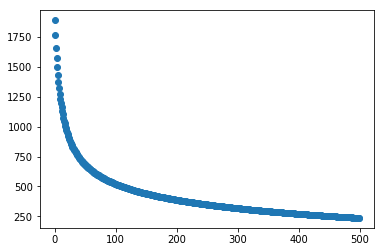

In [24]:
plt.scatter( range(num_iterations), all_costs)
#Plot the cost function for different alpha (learning parameters) values

In [25]:
# For alpha =0.01
num_iterations = 1000
alpha = 0.01

all_costs = []
b,w = init_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = cost_fn (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = beta_update (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, ' & Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and w are: ", b,w)

initial guess of b and w:  0.69229802483718 [0.09354588 0.00678708 0.31873333 0.78472747 0.62324815]
Iteration:  0  & Cost:  3007.4213246265845
Iteration:  10  & Cost:  2952.203108572935
Iteration:  20  & Cost:  2898.8171013249816
Iteration:  30  & Cost:  2847.1962349598316
Iteration:  40  & Cost:  2797.275199413564
Iteration:  50  & Cost:  2748.9905248837895
Iteration:  60  & Cost:  2702.280642168653
Iteration:  70  & Cost:  2657.0859234672653
Iteration:  80  & Cost:  2613.3487060278326
Iteration:  90  & Cost:  2571.013300872443
Iteration:  100  & Cost:  2530.0259886592985
Iteration:  110  & Cost:  2490.335004569464
Iteration:  120  & Cost:  2451.8905139316375
Iteration:  130  & Cost:  2414.644580128225
Iteration:  140  & Cost:  2378.5511261624956
Iteration:  150  & Cost:  2343.565891111638
Iteration:  160  & Cost:  2309.646382545517
Iteration:  170  & Cost:  2276.7518258568157
Iteration:  180  & Cost:  2244.843111325157
Iteration:  190  & Cost:  2213.8827396260567
Iteration:  200  & 

In [26]:
linReg = LogisticRegression() #Use sklearn logistic regression API and compare the estimation of beta values.
lmodel = linReg.fit(X_new, Y)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
lmodel.intercept_

array([-3.56034604])

In [28]:
lmodel.coef_

array([[-0.04637959,  0.03492599,  1.70449578, 11.1739654 , -0.05720112]])

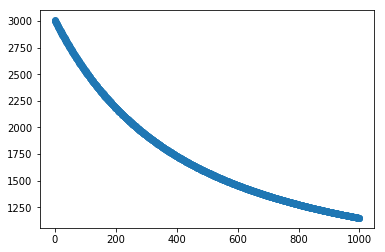

In [29]:
plt.scatter( range(num_iterations), all_costs)

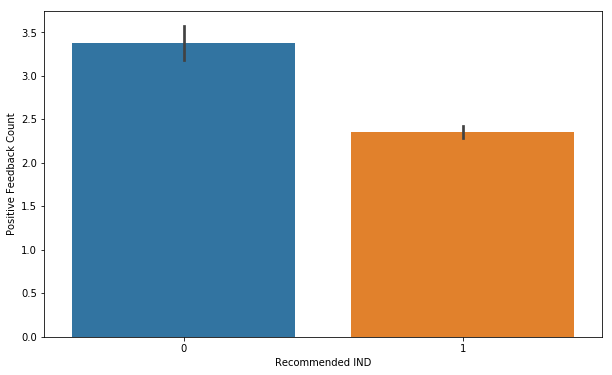

In [30]:
#Here we see that fixed acidity does not give any specification to classify the quality.
df = (df[['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']])
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Recommended IND', y = 'Positive Feedback Count', data = df)

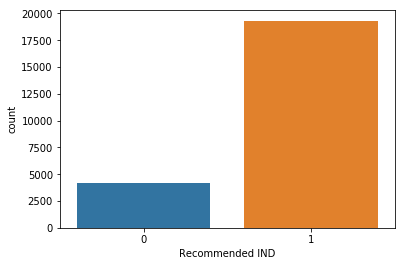

In [31]:
sns.countplot(df['Recommended IND'])

In [32]:
#Now we seperate the dataset as response variable and feature variabes
X = df.drop('Recommended IND', axis = 1)
Y = df['Recommended IND']

In [33]:
#Train and Test splitting of the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
#Applying Standard scaling to get  an optimized result
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Our training and testing data is ready now to perform machine learning algorithm

#### Random Forest Classifier


In [36]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [37]:
#This is how our model is performed now
print(classification_report(Y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       851
           1       0.95      0.95      0.95      3847

    accuracy                           0.92      4698
   macro avg       0.87      0.87      0.87      4698
weighted avg       0.92      0.92      0.92      4698



#### Random forest gives the accuracy of 92%


In [38]:
#Confusion matrix for random forest classification
print(confusion_matrix(Y_test, pred_rfc))

[[ 674  177]
 [ 190 3657]]


#### Stochastic Gradient Decent Classifier

In [39]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, Y_train)
predict_sgd = sgd.predict(X_test)

In [40]:
print(classification_report(Y_test, predict_sgd))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       851
           1       0.97      0.94      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.90      0.89      4698
weighted avg       0.93      0.93      0.93      4698



#### Support Vector Classifier

In [41]:
svc = SVC()
svc.fit(X_train, Y_train)
predict_svc = svc.predict(X_test)

In [42]:
print(classification_report(Y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.94      0.89      4698
weighted avg       0.94      0.93      0.93      4698



In [43]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, Y = Y_train, cv = 10)
rfc_eval.mean()

0.9295826657946595

##### Random forest accuracy increases from 92% to 93 % (Little increment) using cross validation score
